# NSE stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of NSE companies from 2013-2023, as well as looking at the NSE Index itself.

## 2. Install/import libraries

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import seaborn as sns

In [3]:
!pip install yfinance
!pip install mplfinance

In [43]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download NSE stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are 'ADANIPORTS.NS', 'APOLLOTYRE.NS', 'ASIANPAINT.NS', 'BERGEPAINT.NS', 'BRITANNIA.NS', 'DABUR.NS', 'EICHERMOT.NS', 'LT.NS', 'MARUTI.NS', 'PIDILITIND.NS' representing a selection of different industries - Automobile, FMCG and Construction.

In [5]:
!pip install pandas_datareader

In [74]:
nifty_stocks = yf.download("RELIANCE.NS  BPCL.NS INFY.NS WIPRO.NS BAJAJ-AUTO.NS MARUTI.NS HINDUNILVR.NS BRITANNIA.NS ICICIBANK.NS HDFCBANK.NS", start=datetime.datetime(2013, 4, 1), 
                                      end=datetime.datetime(2023, 3, 31), group_by='tickers')

[*********************100%***********************]  10 of 10 completed


## 4. Exploratory Data Analysis

In [75]:
# Descriptive statistics showing distribution of the data

nifty_stocks.describe()

WIPRO.NS                                                      \
              Open         High          Low        Close    Adj Close   
count  2467.000000  2467.000000  2467.000000  2467.000000  2467.000000   
mean    282.477887   285.547735   279.009028   282.179030   275.530874   
std     132.977498   134.276742   131.273587   132.607169   133.655128   
min     121.500031   124.218781   118.068779   121.856277   111.382225   
25%     203.371925   205.462555   201.037552   203.184425   194.240303   
50%     220.800049   222.750061   218.250061   220.500061   214.007050   
75%     330.324997   336.274994   324.250000   334.000000   329.151443   
max     722.750000   739.849976   716.000000   721.500000   712.624756   

                    BRITANNIA.NS                                         ...  \
             Volume         Open         High          Low        Close  ...   
count  2.467000e+03  2467.000000  2467.000000  2467.000000  2467.000000  ...   
mean   6.201330e+06  2316.701824  2342.591313  2288.675509  2314.609427  ...   
std    6.974380e+06  1219.330027  1229.774405  1206.617270  1217.533551  ...   
min    0.000000e+00   257.500000   259.524994   252.000000   256.500000  ...   
25%    3.093913e+06  1383.500000  1403.724976  1364.512512  1382.112549  ...   
50%    4.539125e+06  2465.250000  2500.899902  2431.925049  2473.750000  ...   
75%    6.925068e+06  3422.474976  3454.375000  3388.050049  3419.349976  ...   
max    1.303676e+08  4660.000000  4669.200195  4600.000000  4637.350098  ...   

      ICICIBANK.NS                                            MARUTI.NS  \
               Low        Close    Adj Close        Volume         Open   
count  2467.000000  2467.000000  2467.000000  2.467000e+03  2467.000000   
mean    395.789832   400.804180   391.311745  1.937955e+07  5894.775724   
std     207.313581   209.134896   213.637877  1.383860e+07  2359.765642   
min     137.618179   142.463638   128.099396  0.000000e+00  1238.000000   
25%     249.286369   252.159096   238.663345  1.142337e+07  3919.400024   
50%     308.500000   313.309082   299.543701  1.582812e+07  6679.000000   
75%     514.299988   522.875000   518.238525  2.290106e+07  7617.675049   
max     941.000000   952.900024   952.900024  2.868577e+08  9966.000000   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2467.000000  2467.000000  2467.000000  2467.000000  2.467000e+03  
mean   5959.287885  5823.791883  5889.171625  5679.950675  7.267287e+05  
std    2378.858912  2334.345918  2354.177741  2348.562991  5.658809e+05  
min    1249.000000  1215.000000  1236.349976  1140.650513  0.000000e+00  
25%    3960.500000  3875.500000  3925.400024  3648.344360  3.876080e+05  
50%    6754.000000  6600.000000  6673.549805  6481.380371  5.808580e+05  
75%    7704.675049  7531.175049  7604.025146  7452.241211  9.050765e+05  
max    9996.400391  9725.000000  9832.450195  9527.599609  1.056777e+07  

[8 rows x 60 columns]

In [76]:
# Concise summary of the dataframe to check for missing values and data types
nifty_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2467 entries, 2013-04-01 to 2023-03-29
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (WIPRO.NS, Open)            2467 non-null   float64
 1   (WIPRO.NS, High)            2467 non-null   float64
 2   (WIPRO.NS, Low)             2467 non-null   float64
 3   (WIPRO.NS, Close)           2467 non-null   float64
 4   (WIPRO.NS, Adj Close)       2467 non-null   float64
 5   (WIPRO.NS, Volume)          2467 non-null   int64  
 6   (BRITANNIA.NS, Open)        2467 non-null   float64
 7   (BRITANNIA.NS, High)        2467 non-null   float64
 8   (BRITANNIA.NS, Low)         2467 non-null   float64
 9   (BRITANNIA.NS, Close)       2467 non-null   float64
 10  (BRITANNIA.NS, Adj Close)   2467 non-null   float64
 11  (BRITANNIA.NS, Volume)      2467 non-null   int64  
 12  (HDFCBANK.NS, Open)         2467 non-null   float64
 13  (HDFCBANK.NS, H

In [77]:
# Number of rows indicates number of trading days
nifty_stocks.shape

(2467, 60)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [79]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [80]:
tickers = ['RELIANCE.NS','BPCL.NS' ,'INFY.NS', 'WIPRO.NS', 'BAJAJ-AUTO.NS', 'MARUTI.NS', 'HINDUNILVR.NS', 'BRITANNIA.NS','ICICIBANK.NS', 'HDFCBANK.NS']
for ticker in tickers:
    adj_close[ticker] = nifty_stocks[ticker]['Adj Close']

adj_close

RELIANCE.NS     BPCL.NS      INFY.NS    WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                          
2013-04-01   359.302368   74.410233   289.284058  147.732666    1364.384888   
2013-04-02   366.292389   74.548378   291.725708  154.125275    1342.478882   
2013-04-03   358.287323   74.015480   291.666840  153.765366    1296.253418   
2013-04-04   354.134949   72.939789   282.980988  152.565720    1281.892090   
2013-04-05   359.925293   74.311554   281.585724  155.821991    1303.070557   
...                 ...         ...          ...         ...            ...   
2023-03-23  2247.800049  348.350006  1374.550049  361.500000    3862.949951   
2023-03-24  2203.300049  345.399994  1380.650024  361.750000    3827.899902   
2023-03-27  2237.550049  344.850006  1388.949951  361.250000    3807.550049   
2023-03-28  2248.000000  339.850006  1377.599976  356.200012    3791.600098   
2023-03-29  2234.699951  339.850006  1383.550049  359.049988    3879.300049   

              MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  \
Date                                                                 
2013-04-01  1177.562500     396.304565    224.383514    169.083511   
2013-04-02  1199.576416     395.926239    224.617493    168.335831   
2013-04-03  1195.632080     389.115875    221.192947    165.843506   
2013-04-04  1202.603149     395.211639    218.236313    162.209579   
2013-04-05  1289.925171     396.598907    219.789078    160.497086   
...                 ...            ...           ...           ...   
2023-03-23  8353.200195    2485.100098   4171.182617    855.450012   
2023-03-24  8242.900391    2480.800049   4129.152832    852.400024   
2023-03-27  8278.349609    2499.000000   4143.752441    848.700012   
2023-03-28  8208.799805    2482.800049   4129.202148    854.750000   
2023-03-29  8295.299805    2530.850098   4204.117676    851.000000   

            HDFCBANK.NS  
Date                     
2013-04-01   287.628418  
2013-04-02   290.417755  
2013-04-03   287.536133  
2013-04-04   284.078278  
2013-04-05   286.291382  
...                 ...  
2023-03-23  1545.427246  
2023-03-24  1542.955566  
2023-03-27  1549.678345  
2023-03-28  1562.283813  
2023-03-29  1569.797729  

[2467 rows x 10 columns]

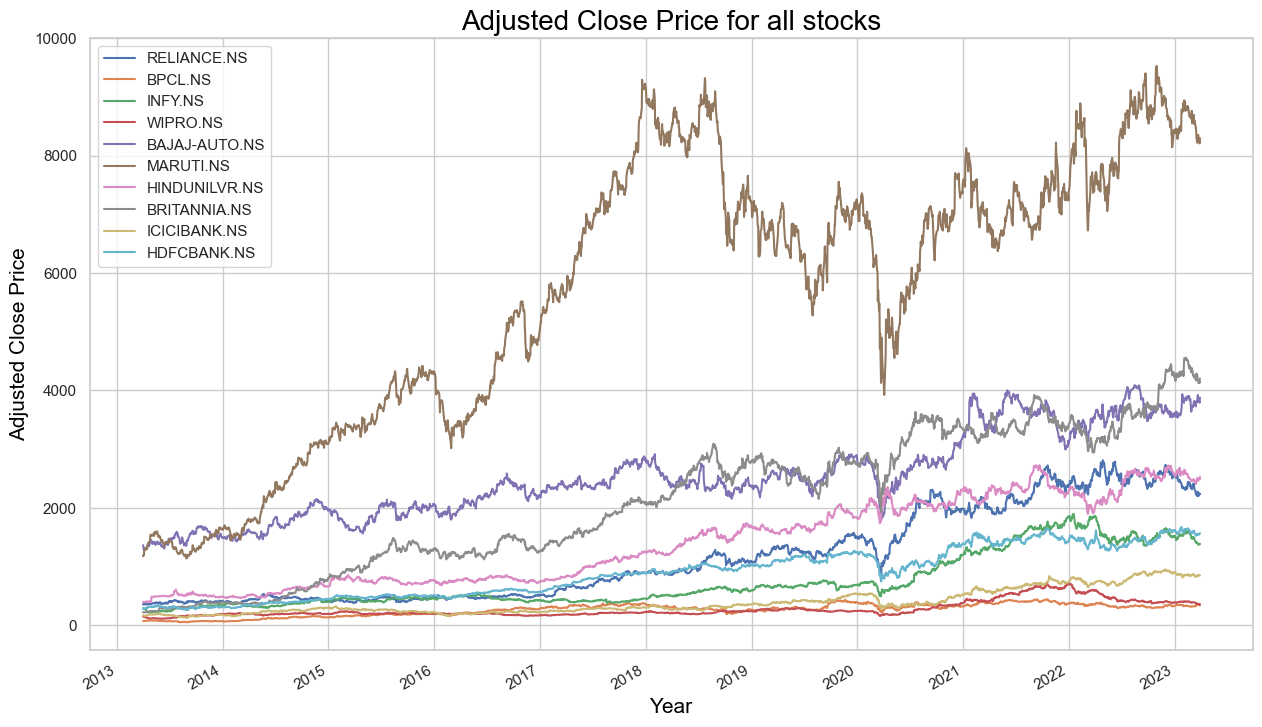

In [81]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(25, 15)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading NESTLEIND.NS and  MARUTI.NS stocks are far more expensive than others stocks and making the latter appear much less volatile than they truly are. 

In [82]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

RELIANCE.NS     BPCL.NS      INFY.NS    WIPRO.NS  BAJAJ-AUTO.NS  \
min   354.134949   51.603584   217.341354  111.382225    1281.892090   
max  2811.385742  443.271271  1898.427979  712.624756    4091.149902   

       MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  HDFCBANK.NS  
min  1140.650513     389.115875    218.236313    128.099396   261.230072  
max  9527.599609    2727.979248   4559.179688    952.900024  1676.276611

One solution would be to use two different scales when plotting the data. One scale will be used by the NESTLE.NS and MARUTI.NS stocks, and the other by the less expensive stocks.

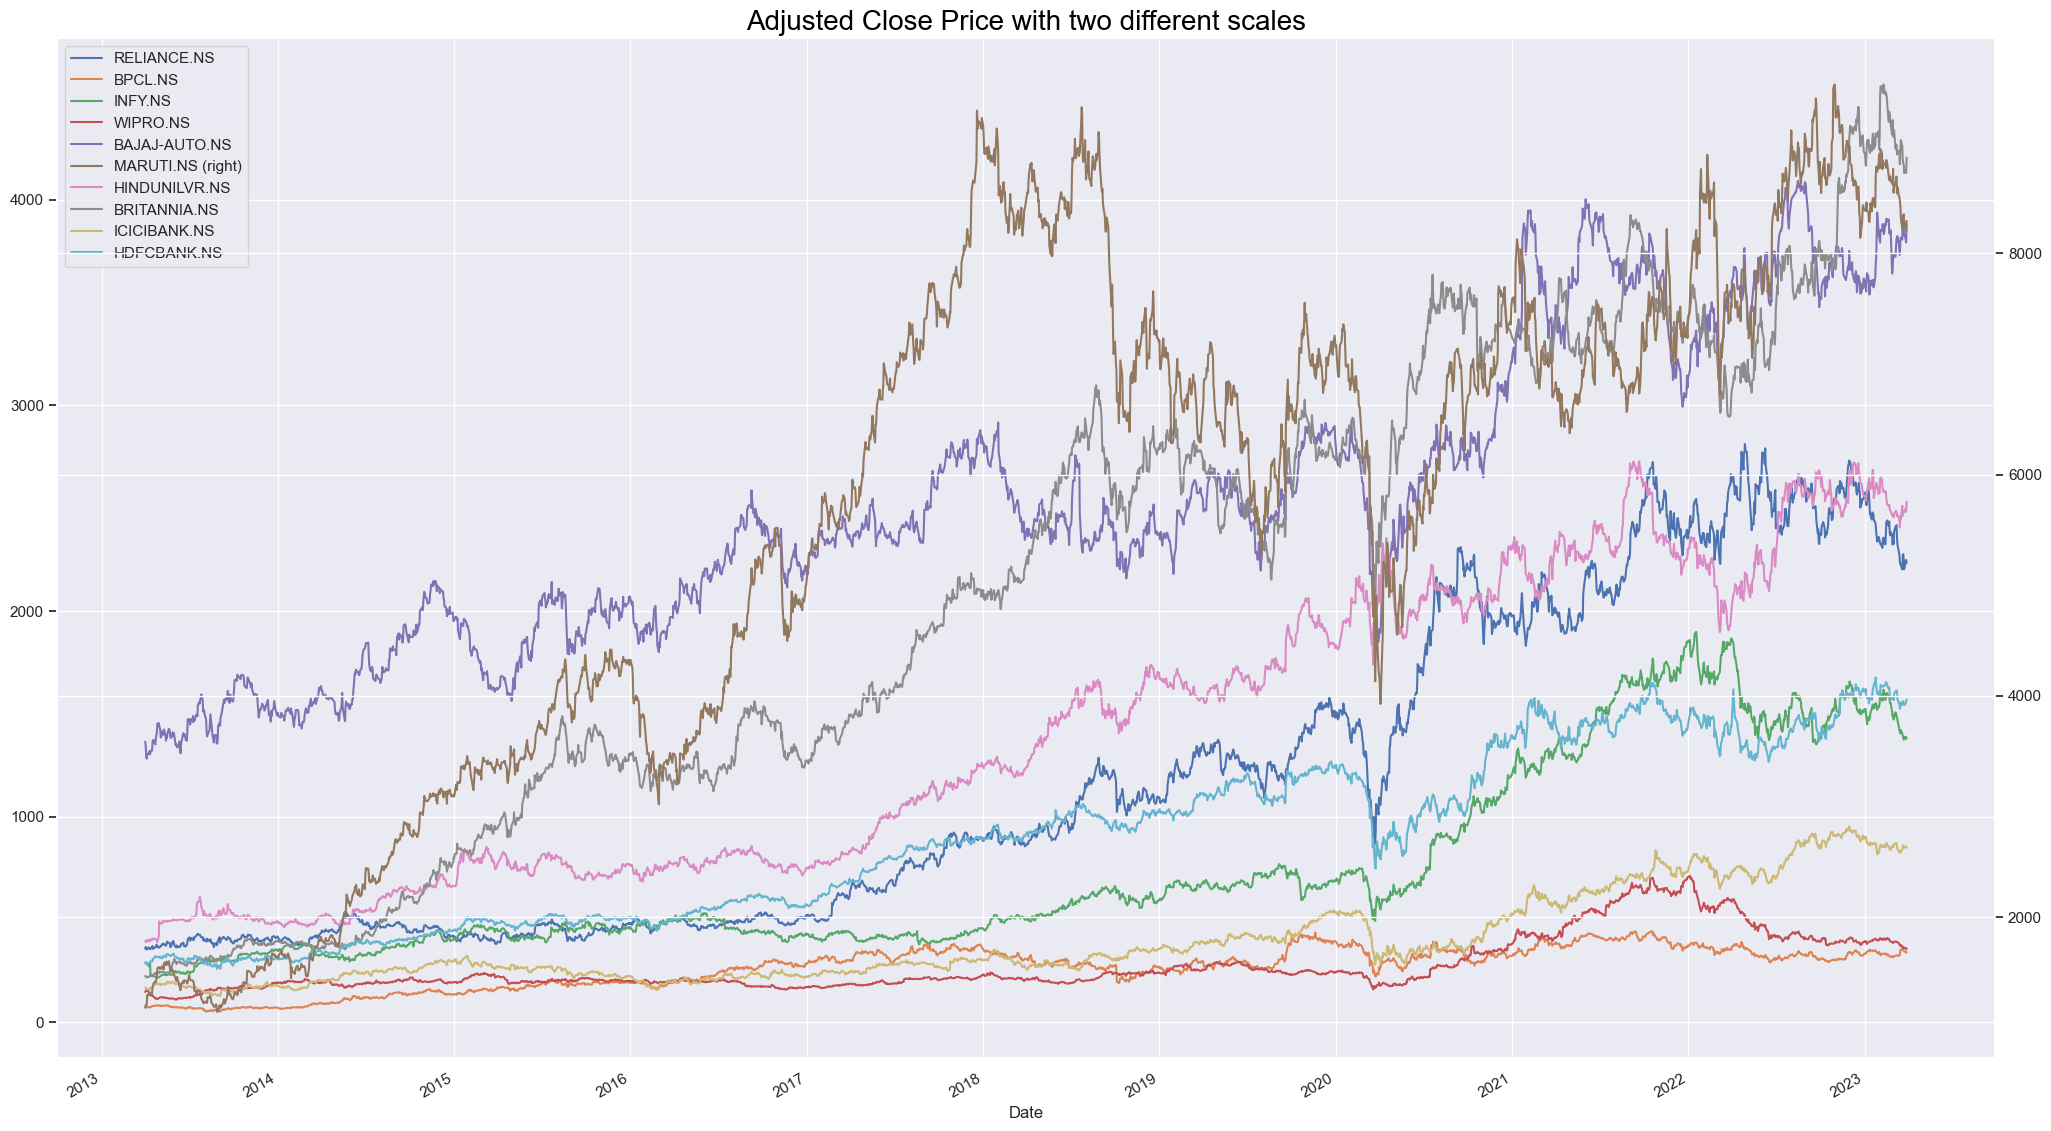

In [83]:
# Plot APOLLOTYRES.NS, BERGERPAINTS.NS,DABUR.NS data on a secondary y-axis

adj_close.plot(secondary_y = ['NESTLEIND.NS','MARUTI.NS'], grid = True)
sns.set(rc={'figure.figsize':(25, 15)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [84]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2013-04-01     1.000000  1.000000  1.000000  1.000000       1.000000   
2013-04-02     1.019454  1.001857  1.008440  1.043271       0.983944   
2013-04-03     0.997175  0.994695  1.008237  1.040835       0.950064   
2013-04-04     0.985618  0.980239  0.978211  1.032715       0.939538   
2013-04-05     1.001734  0.998674  0.973388  1.054757       0.955061   

            MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  HDFCBANK.NS  
Date                                                                           
2013-04-01   1.000000       1.000000      1.000000      1.000000     1.000000  
2013-04-02   1.018694       0.999045      1.001043      0.995578     1.009698  
2013-04-03   1.015345       0.981861      0.985781      0.980838     0.999679  
2013-04-04   1.021265       0.997242      0.972604      0.959346     0.987657  
2013-04-05   1.095420       1.000743      0.979524      0.949218     0.995352

Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

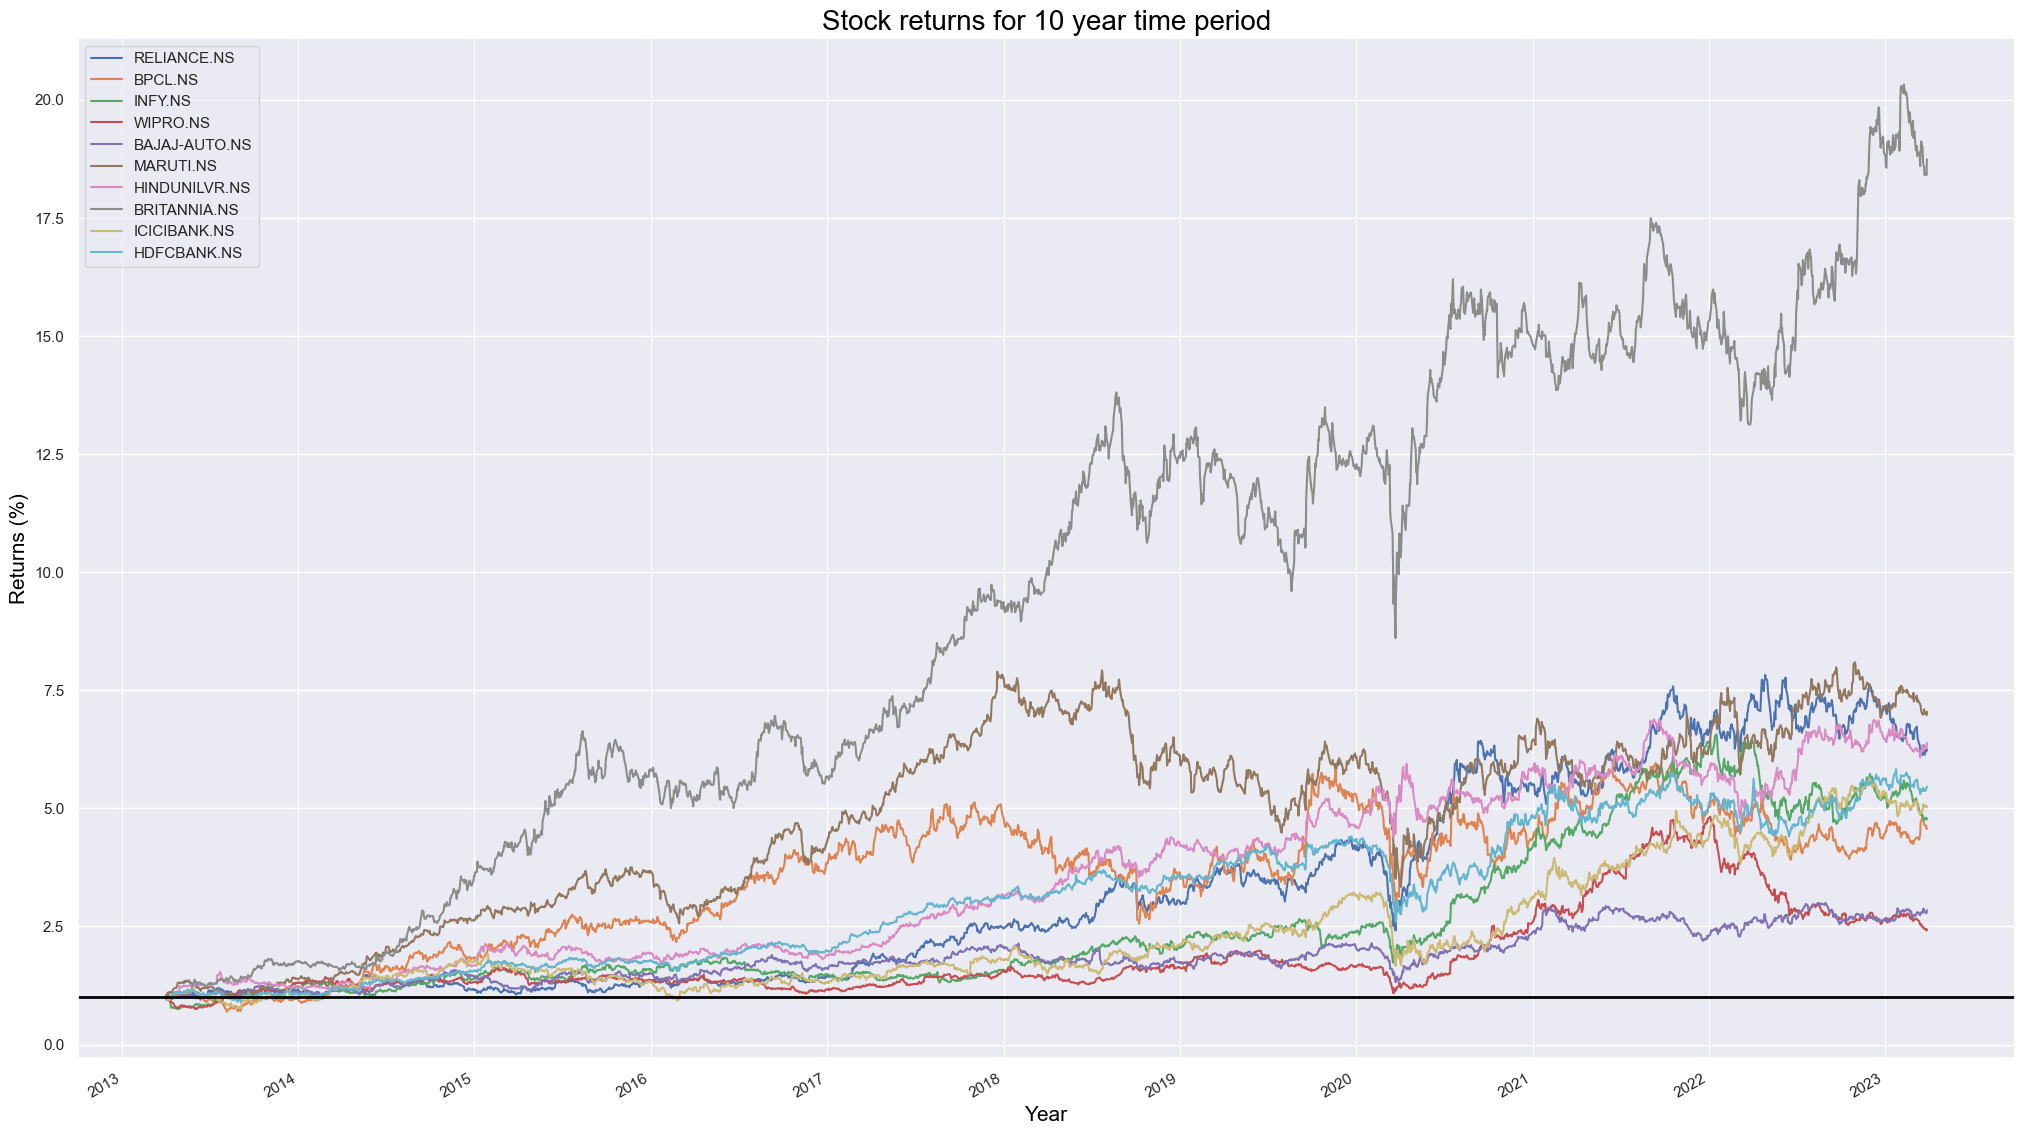

In [85]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [86]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [88]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['RELIANCE.NS',  'BPCL.NS', 'INFY.NS', 'WIPRO.NS', 'BAJAJ-AUTO.NS', 'MARUTI.NS','HINDUNILVR.NS', 'BRITANNIA.NS','ICICIBANK.NS', 'HDFCBANK.NS']
for ticker in tickers:
    returns[ticker] = nifty_stocks[ticker]['Adj Close'].pct_change() * 100

returns

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2013-04-01          NaN       NaN       NaN       NaN            NaN   
2013-04-02     1.945442  0.185654  0.844032  4.327146      -1.605559   
2013-04-03    -2.185431 -0.714835 -0.020179 -0.233517      -3.443292   
2013-04-04    -1.158951 -1.453333 -2.978005 -0.780180      -1.107911   
2013-04-05     1.635067  1.880682 -0.493059  2.134340       1.652126   
...                 ...       ...       ...       ...            ...   
2023-03-23    -1.265046 -0.980666 -1.058121 -1.337335      -1.554556   
2023-03-24    -1.979713 -0.846853  0.443780  0.069156      -0.907339   
2023-03-27     1.554486 -0.159232  0.601161 -0.138217      -0.531619   
2023-03-28     0.467026 -1.449906 -0.817162 -1.397920      -0.418903   
2023-03-29    -0.591639  0.000000  0.431916  0.800105       2.313006   

            MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  HDFCBANK.NS  
Date                                                                           
2013-04-01        NaN            NaN           NaN           NaN          NaN  
2013-04-02   1.869448      -0.095464      0.104276     -0.442196     0.969771  
2013-04-03  -0.328811      -1.720109     -1.524612     -1.480567    -0.992234  
2013-04-04   0.583045       1.566568     -1.336677     -2.191178    -1.202581  
2013-04-05   7.261084       0.351019      0.711506     -1.055729     0.779047  
...               ...            ...           ...           ...          ...  
2023-03-23   1.221460       0.353343     -0.041223     -0.552197    -0.802768  
2023-03-24  -1.320450      -0.173033     -1.007623     -0.356536    -0.159935  
2023-03-27   0.430058       0.733632      0.353574     -0.434070     0.435708  
2023-03-28  -0.840141      -0.648257     -0.351138      0.712854     0.813425  
2023-03-29   1.053747       1.935317      1.814286     -0.438725     0.480957  

[2467 rows x 10 columns]

In [89]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2013-04-02     1.945442  0.185654  0.844032  4.327146      -1.605559   
2013-04-03    -2.185431 -0.714835 -0.020179 -0.233517      -3.443292   
2013-04-04    -1.158951 -1.453333 -2.978005 -0.780180      -1.107911   
2013-04-05     1.635067  1.880682 -0.493059  2.134340       1.652126   
2013-04-08     1.192154  1.049110 -1.184621 -1.275848       0.246872   

            MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  HDFCBANK.NS  
Date                                                                           
2013-04-02   1.869448      -0.095464      0.104276     -0.442196     0.969771  
2013-04-03  -0.328811      -1.720109     -1.524612     -1.480567    -0.992234  
2013-04-04   0.583045       1.566568     -1.336677     -2.191178    -1.202581  
2013-04-05   7.261084       0.351019      0.711506     -1.055729     0.779047  
2013-04-08   0.984843       1.325010      0.454850     -0.906674     0.563649

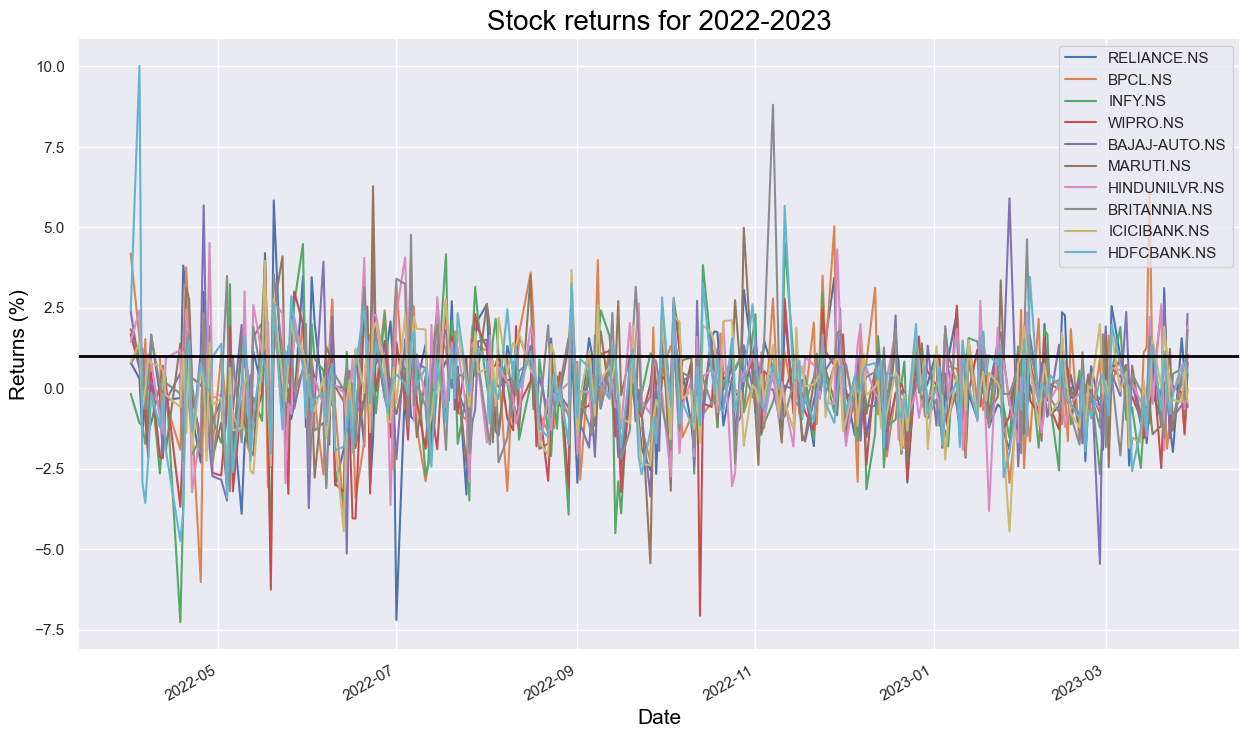

In [90]:
# Plot returns for 2022-2023

returns.loc['2022-04-01':'2023-03-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2022-2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2022-2023 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.


### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from Rs. 100 to Rs. 150) and then declines by 50% (say from Rs. 150 to Rs. 75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [91]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2013-04-01          NaN       NaN       NaN       NaN            NaN   
2013-04-02     0.019268  0.001855  0.008405  0.042361      -0.016186   
2013-04-03    -0.022097 -0.007174 -0.000202 -0.002338      -0.035040   
2013-04-04    -0.011657 -0.014640 -0.030232 -0.007832      -0.011141   
2013-04-05     0.016218  0.018632 -0.004943  0.021119       0.016386   

            MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  HDFCBANK.NS  
Date                                                                           
2013-04-01        NaN            NaN           NaN           NaN          NaN  
2013-04-02   0.018522      -0.000955      0.001042     -0.004432     0.009651  
2013-04-03  -0.003294      -0.017351     -0.015364     -0.014916    -0.009972  
2013-04-04   0.005814       0.015544     -0.013457     -0.022155    -0.012099  
2013-04-05   0.070096       0.003504      0.007090     -0.010613     0.007760

In [60]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

RELIANCE.NS   BPCL.NS  HINDPETRO.NS  TECHM.NS   INFY.NS  WIPRO.NS  \
Date                                                                            
2013-04-02     0.019267  0.001855      0.010545 -0.033491  0.008405  0.042361   
2013-04-03    -0.022096 -0.007174     -0.011075 -0.049080 -0.000202 -0.002338   
2013-04-04    -0.011657 -0.014640     -0.011914 -0.000051 -0.030232 -0.007833   
2013-04-05     0.016218  0.018632      0.016324 -0.015628 -0.004943  0.021119   
2013-04-08     0.011851  0.010437      0.021244  0.022717 -0.011917 -0.012841   

            BAJAJ-AUTO.NS  MARUTI.NS  EICHERMOT.NS  HINDUNILVR.NS  \
Date                                                                
2013-04-02      -0.016186   0.018522      0.057359      -0.000955   
2013-04-03      -0.035039  -0.003294     -0.002037      -0.017351   
2013-04-04      -0.011141   0.005814     -0.014661       0.015544   
2013-04-05       0.016386   0.070096      0.002462       0.003504   
2013-04-08       0.002466   0.009800      0.014236       0.013163   

            BRITANNIA.NS  NESTLEIND.NS  AXISBANK.NS  ICICIBANK.NS  HDFCBANK.NS  
Date                                                                            
2013-04-02      0.001042     -0.000173    -0.010359     -0.004432     0.009651  
2013-04-03     -0.015364      0.005147    -0.017988     -0.014916    -0.009972  
2013-04-04     -0.013457     -0.020287    -0.027202     -0.022156    -0.012099  
2013-04-05      0.007090     -0.021829    -0.011563     -0.010613     0.007760  
2013-04-08      0.004538     -0.000326    -0.021664     -0.009108     0.005621

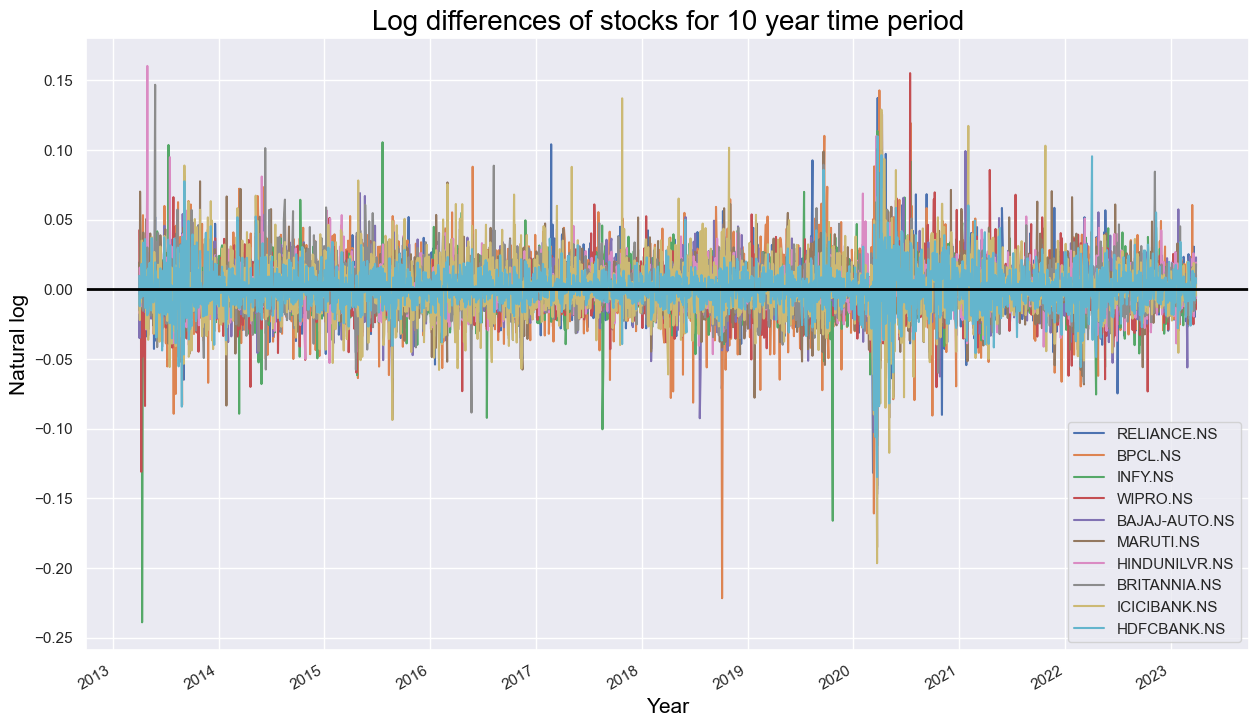

In [92]:
# Plot log differences for 2013-2023

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

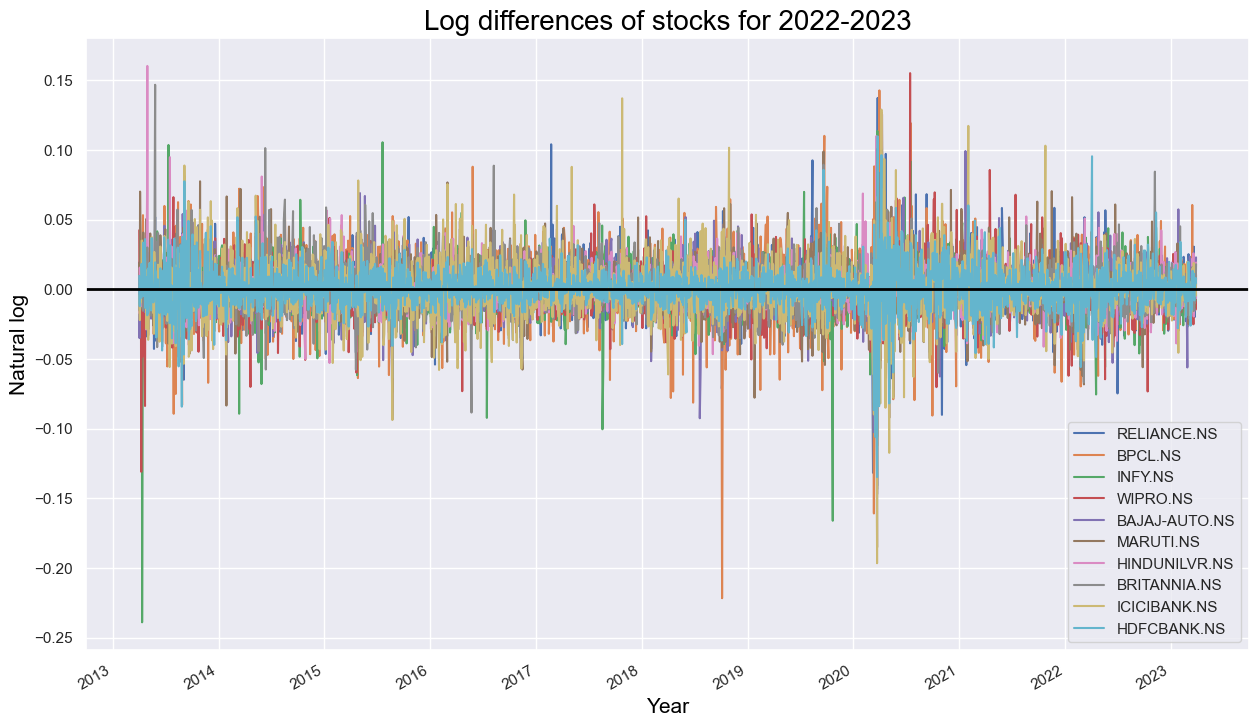

In [93]:
# Plot log differences for 2022-2023

stock_change.loc['2013-04-01':'2023-03-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2022-2023', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [94]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

RELIANCE.NS     BPCL.NS     INFY.NS     WIPRO.NS  BAJAJ-AUTO.NS  \
Date                                                                          
2013-04-01          NaN         NaN         NaN          NaN            NaN   
2013-04-02   485.543675   46.741390  211.803504  1067.507628    -407.884139   
2013-04-03  -556.835544 -180.785369   -5.085714   -58.915155    -883.000426   
2013-04-04  -293.761216 -368.927269 -761.858421  -197.376206    -280.751580   
2013-04-05   408.704657  469.530272 -124.558233   532.194282     412.933863   
...                 ...         ...         ...          ...            ...   
2023-03-23  -320.825307 -248.347477 -268.067339  -339.282078    -394.825018   
2023-03-24  -503.892224 -214.315692  111.585099    17.421363    -229.693041   
2023-03-27   388.717068  -40.158480  151.038982   -34.854777    -134.325423   
2023-03-28   117.416702 -368.050935 -206.770886  -354.761424    -105.785345   
2023-03-29  -149.535868    0.000000  108.608425   200.824229     576.238779   

              MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  \
Date                                                                 
2013-04-01          NaN            NaN           NaN           NaN   
2013-04-02   466.751471     -24.068305     26.263874   -111.680519   
2013-04-03   -82.996829    -437.238893   -387.161138   -375.892483   
2013-04-04   146.500593     391.714805   -339.114033   -558.316291   
2013-04-05  1766.411922      88.301908    178.664708   -267.458072   
...                 ...            ...           ...           ...   
2023-03-23   305.943319      88.885394    -10.390453   -139.539305   
2023-03-24  -334.969771     -43.642141   -255.208876    -90.007638   
2023-03-27   108.142142     184.200493     88.943491   -109.623717   
2023-03-28  -212.609885    -163.892651    -88.642517    179.001828   
2023-03-29   264.154969     483.040607    453.102050   -110.801879   

            HDFCBANK.NS  
Date                     
2013-04-01          NaN  
2013-04-02   243.204938  
2013-04-03  -251.291619  
2013-04-04  -304.887396  
2013-04-05   195.559164  
...                 ...  
2023-03-23  -203.113857  
2023-03-24   -40.335894  
2023-03-27   109.559867  
2023-03-28   204.153864  
2023-03-29   120.910675  

[2467 rows x 10 columns]

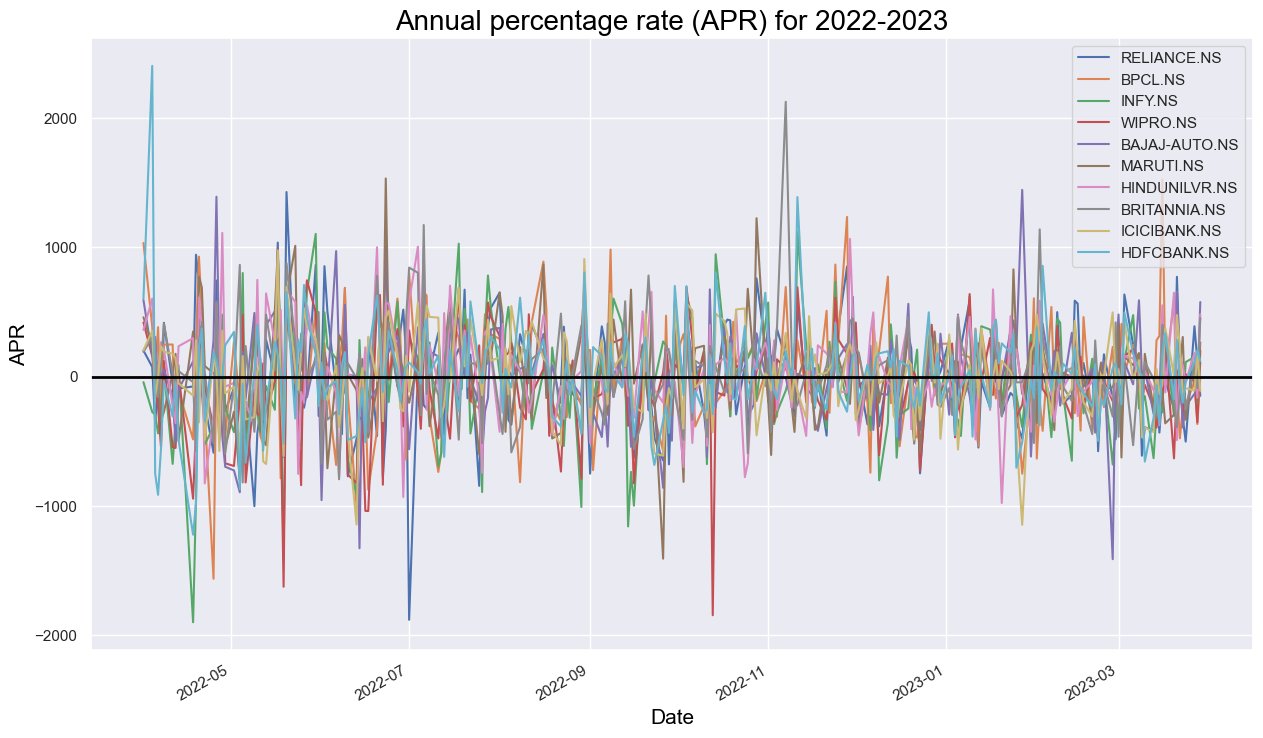

In [95]:
# Plot annualised returns for 2023

stock_change_apr['2022-04-01':'2023-03-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2022-2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2013-2023

In [96]:
# Date of worst single day returns

returns.idxmin()

RELIANCE.NS     2020-03-23
BPCL.NS         2018-10-05
INFY.NS         2013-04-12
WIPRO.NS        2013-04-09
BAJAJ-AUTO.NS   2020-03-23
MARUTI.NS       2020-03-23
HINDUNILVR.NS   2020-03-23
BRITANNIA.NS    2020-03-23
ICICIBANK.NS    2020-03-23
HDFCBANK.NS     2020-03-23
dtype: datetime64[ns]

In [97]:
# Date of best single day returns

returns.idxmax()

RELIANCE.NS     2020-03-25
BPCL.NS         2020-03-31
INFY.NS         2020-03-24
WIPRO.NS        2020-07-15
BAJAJ-AUTO.NS   2020-04-07
MARUTI.NS       2020-04-07
HINDUNILVR.NS   2013-04-30
BRITANNIA.NS    2013-05-27
ICICIBANK.NS    2017-10-25
HDFCBANK.NS     2020-03-25
dtype: datetime64[ns]

There may be some significance in the two FMCG stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [98]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

RELIANCE.NS      0.090320
BPCL.NS          0.086460
INFY.NS          0.078794
WIPRO.NS         0.049530
BAJAJ-AUTO.NS    0.055150
MARUTI.NS        0.095998
HINDUNILVR.NS    0.086640
BRITANNIA.NS     0.132900
ICICIBANK.NS     0.087732
HDFCBANK.NS      0.080004
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [99]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

RELIANCE.NS      3.246216
BPCL.NS          4.946423
INFY.NS          3.025587
WIPRO.NS         2.709899
BAJAJ-AUTO.NS    2.554396
MARUTI.NS        3.366218
HINDUNILVR.NS    2.318754
BRITANNIA.NS     2.821307
ICICIBANK.NS     4.448431
HDFCBANK.NS      2.235216
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [100]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

RELIANCE.NS      1.801726
BPCL.NS          2.224056
INFY.NS          1.739421
WIPRO.NS         1.646177
BAJAJ-AUTO.NS    1.598248
MARUTI.NS        1.834726
HINDUNILVR.NS    1.522745
BRITANNIA.NS     1.679675
ICICIBANK.NS     2.109130
HDFCBANK.NS      1.495064
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [101]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

RELIANCE.NS      0.299266
BPCL.NS         -0.237711
INFY.NS         -0.877363
WIPRO.NS         0.304741
BAJAJ-AUTO.NS    0.064596
MARUTI.NS        0.191651
HINDUNILVR.NS    1.483479
BRITANNIA.NS     0.695149
ICICIBANK.NS     0.257211
HDFCBANK.NS      0.123858
dtype: float64

Here the data looks non symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 except HINDUNILVR.NS and BRITANIA.NS. With a measure of 1.48, HINDUNILVER.NS is highly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [102]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

RELIANCE.NS       7.277237
BPCL.NS           6.640562
INFY.NS          16.370027
WIPRO.NS          8.614177
BAJAJ-AUTO.NS     7.104245
MARUTI.NS         8.420780
HINDUNILVR.NS    13.285582
BRITANNIA.NS      8.805697
ICICIBANK.NS      6.437220
HDFCBANK.NS       8.726470
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that INFY.NS has significant excess kurtosis followed by AXISBANK.NS


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

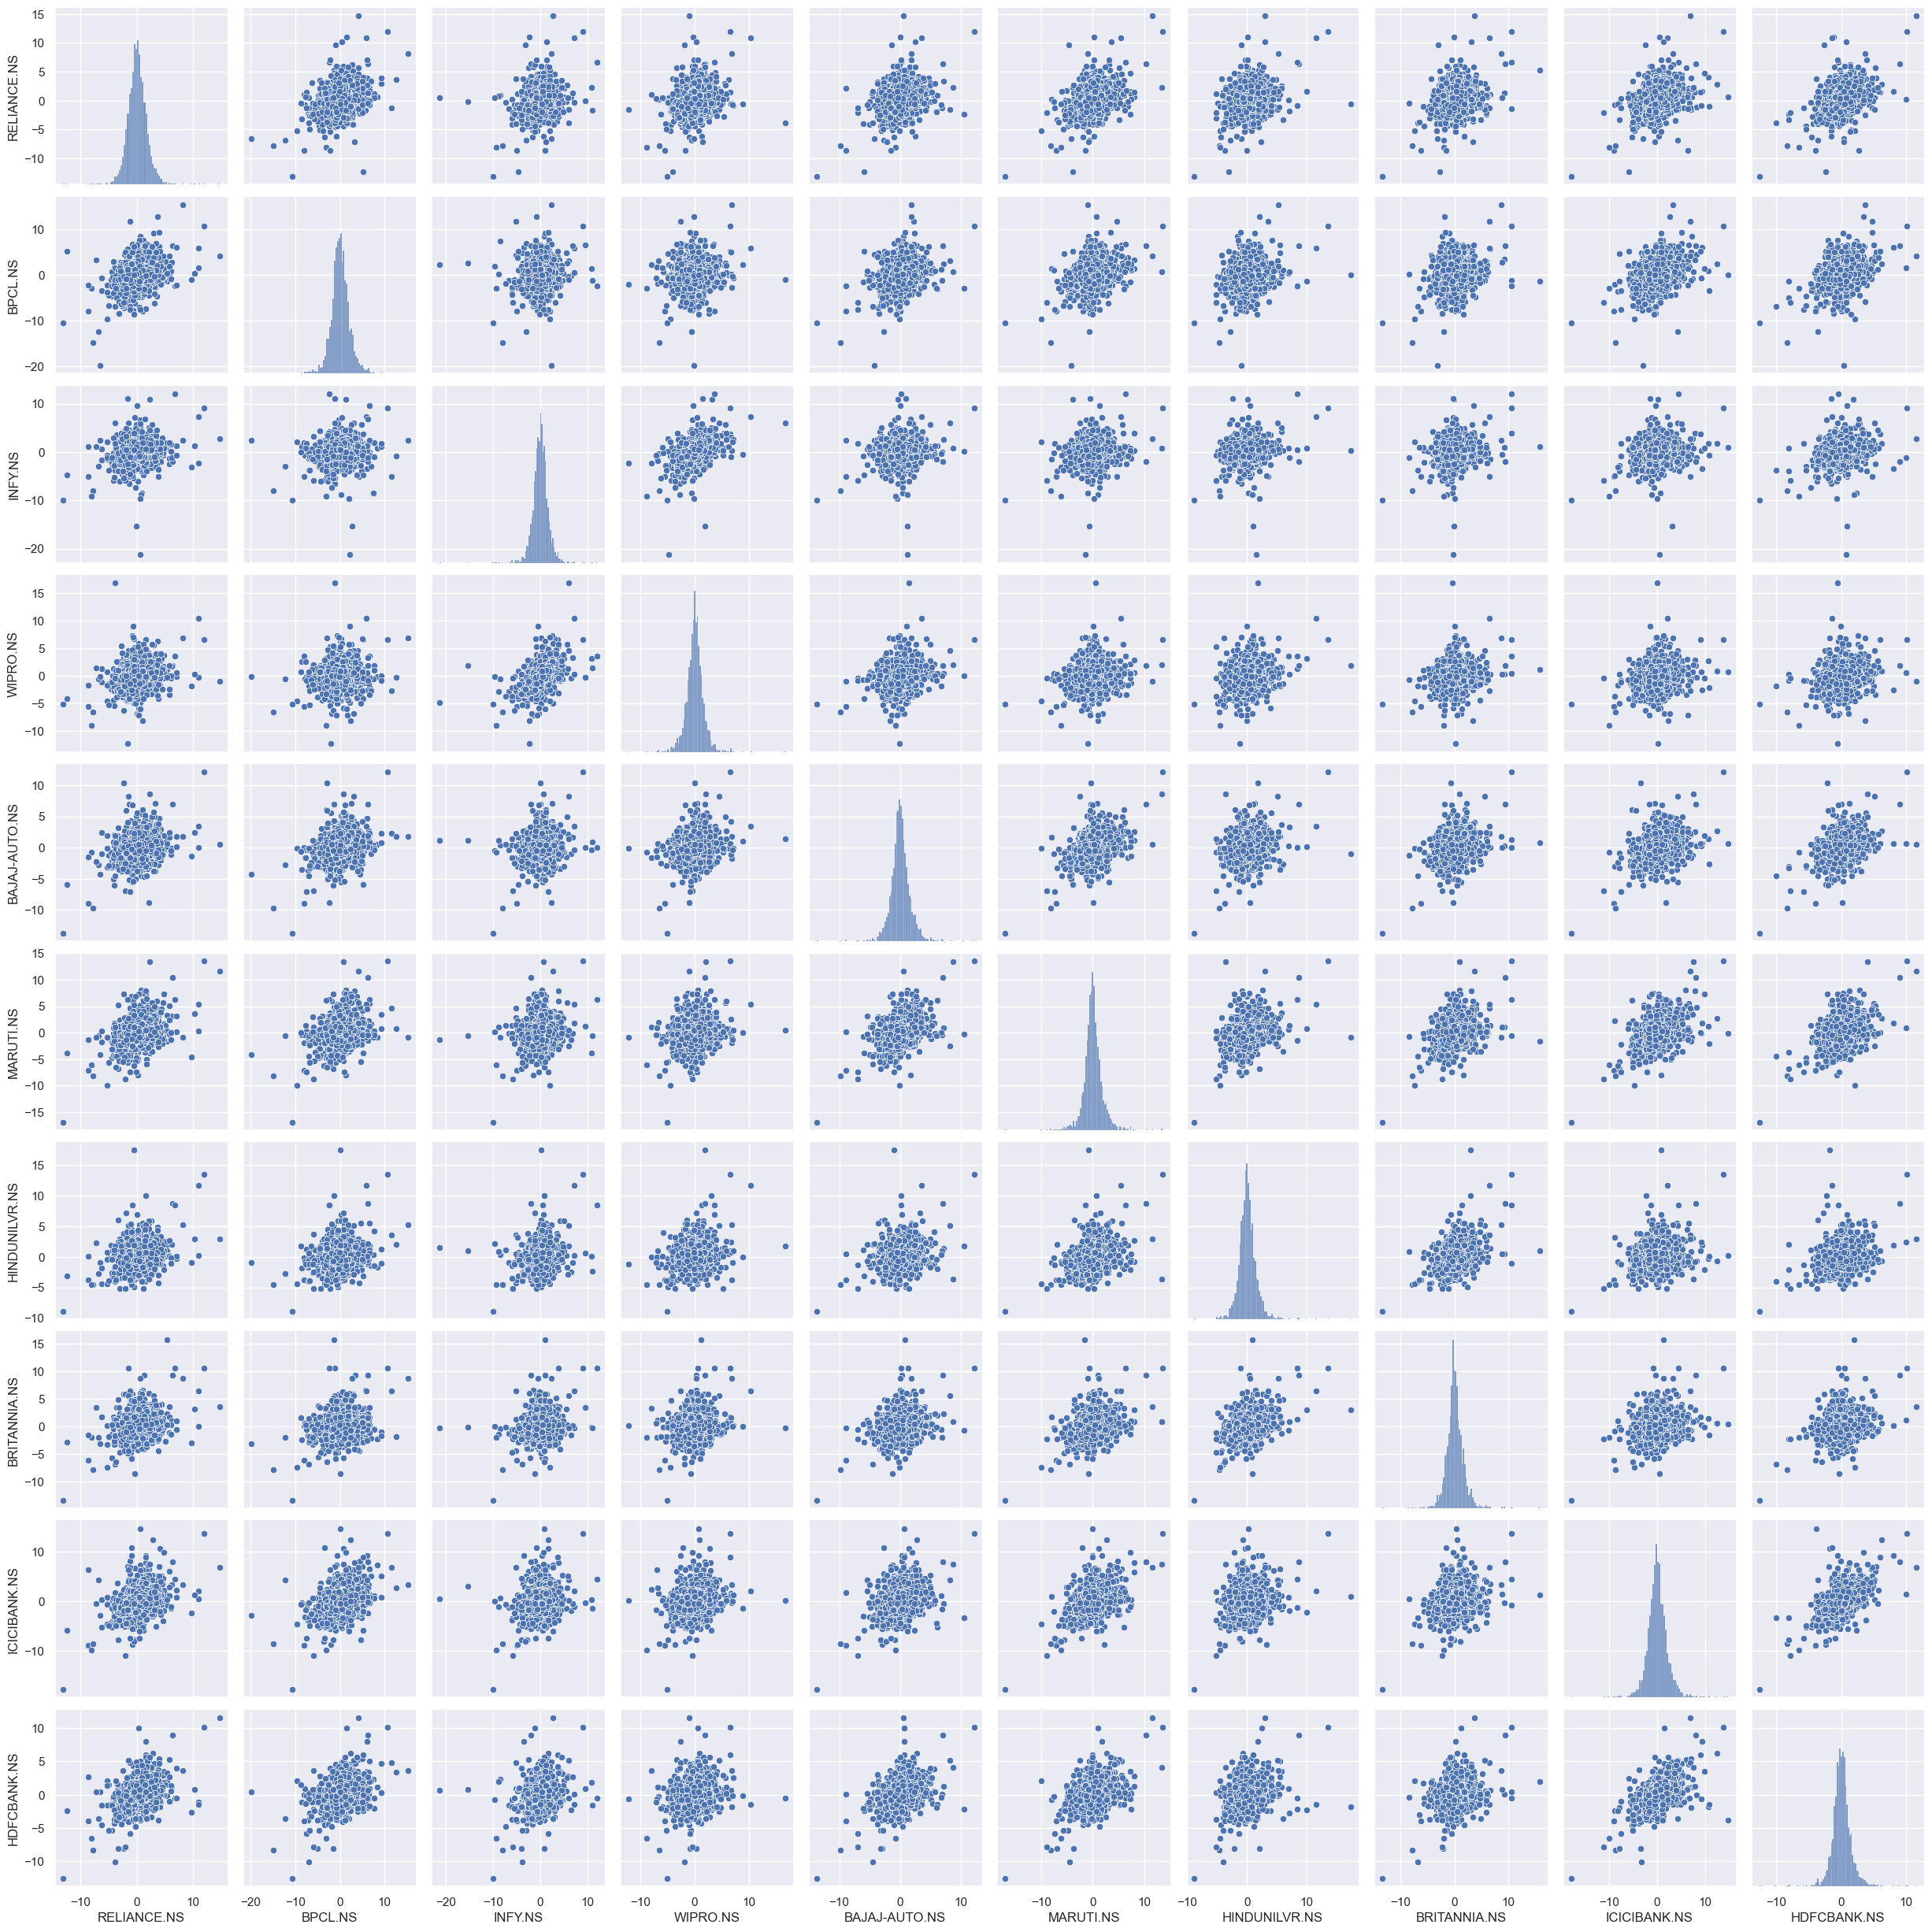

In [103]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



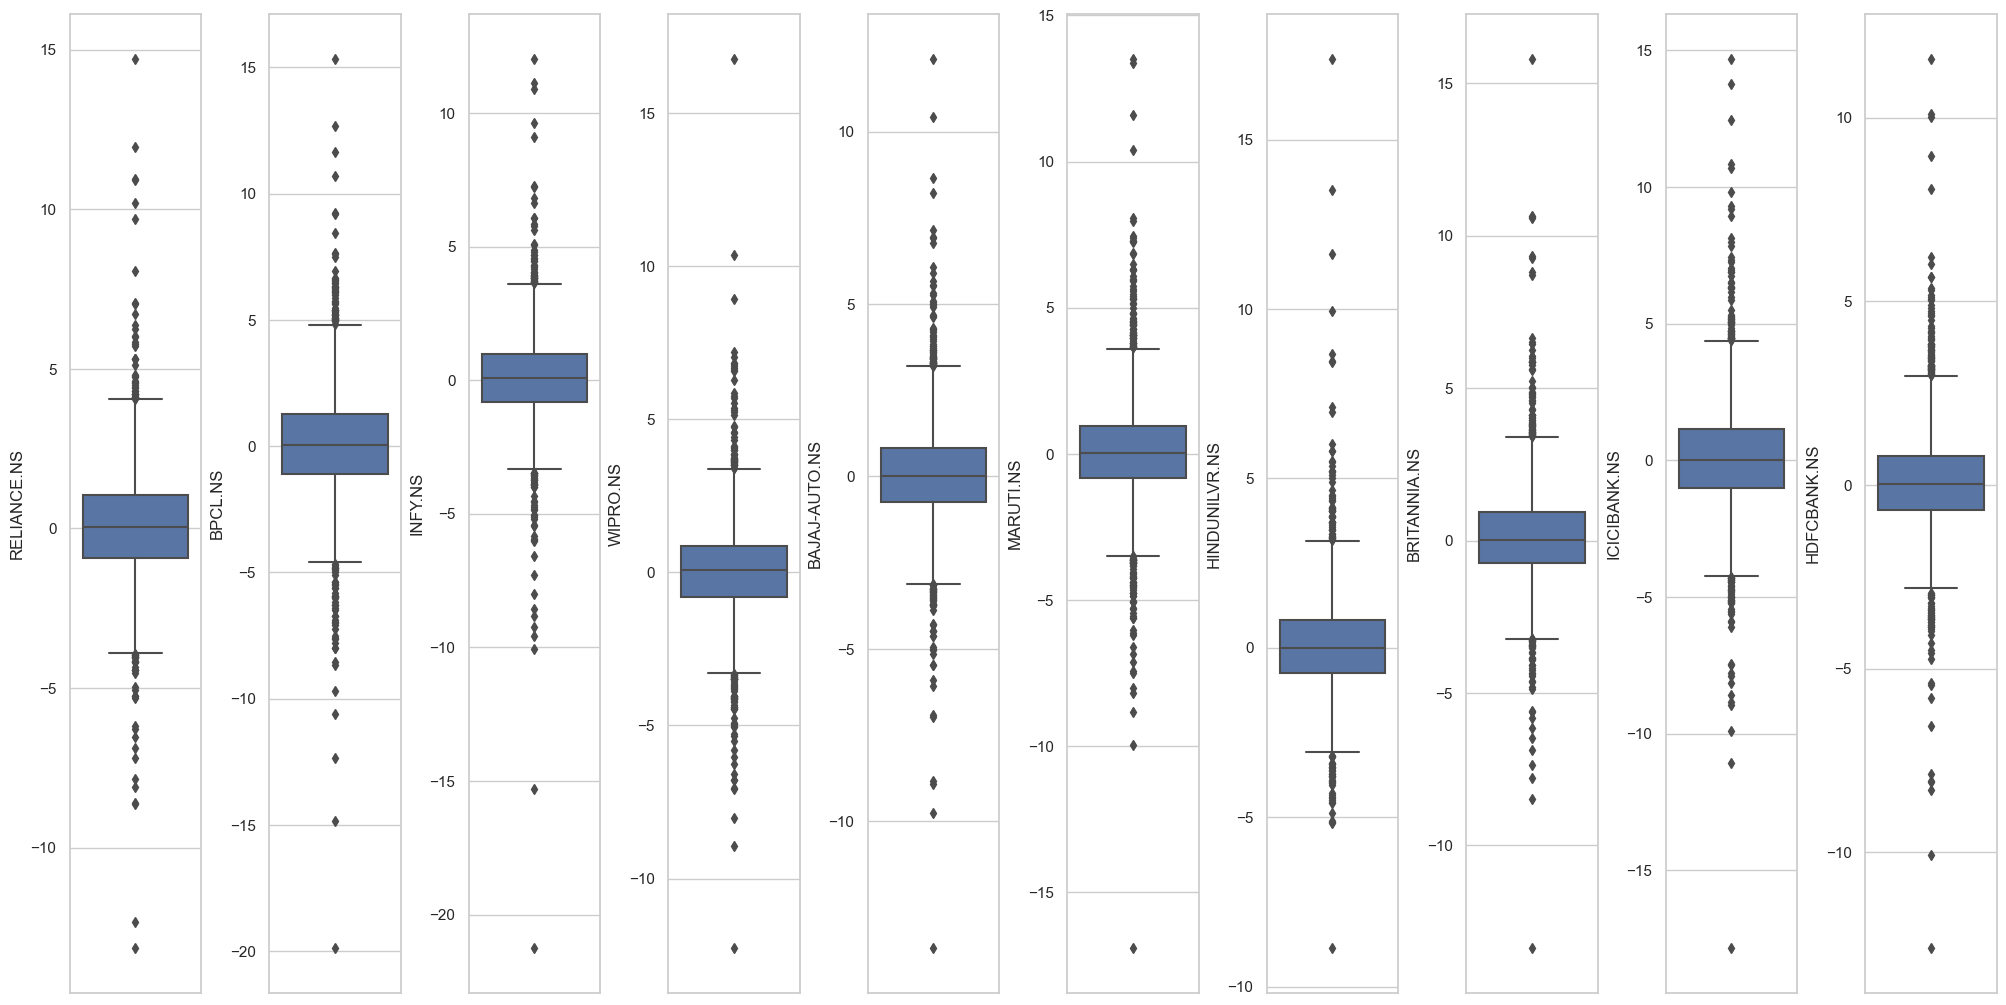

In [104]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=10, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that HINDUNILVR.NS do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that HINDUNILVR.NS is different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.

### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

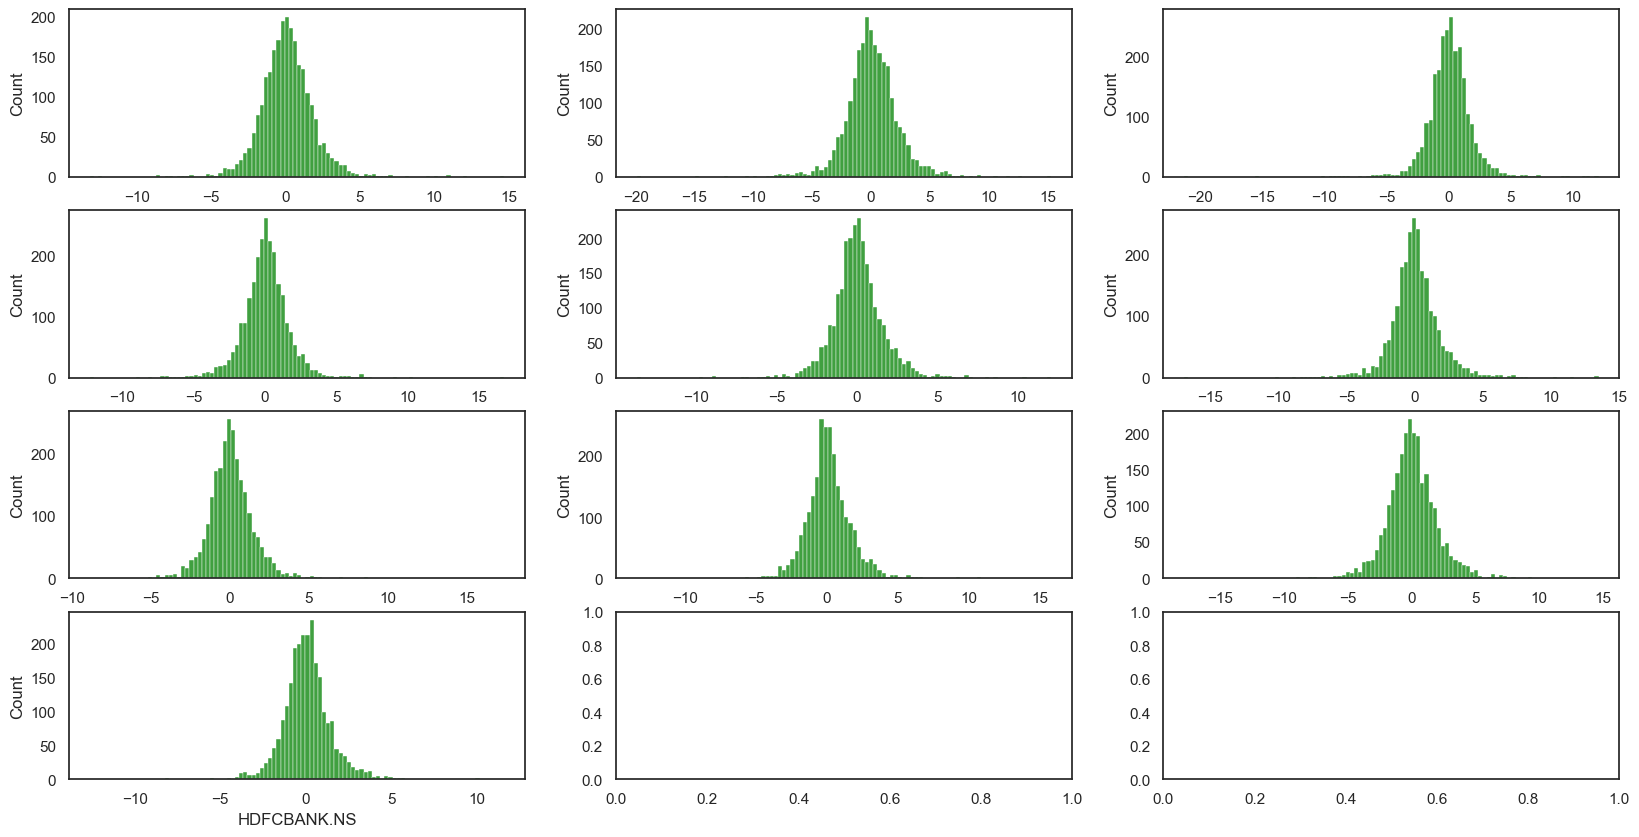

In [106]:
# Distribution plots showing the data for returns for 2022-2023 

sns.set_style("white")

tickers = ['RELIANCE.NS',  'BPCL.NS', 'INFY.NS', 'WIPRO.NS', 'BAJAJ-AUTO.NS', 'MARUTI.NS','HINDUNILVR.NS', 'BRITANNIA.NS','ICICIBANK.NS', 'HDFCBANK.NS']
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.histplot(returns.loc['2013-04-01':'2023-03-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [107]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
RELIANCE.NS       3.246216  1.435598  0.710814  0.670094       0.936482   
BPCL.NS           1.435598  4.946423  0.428195  0.506674       1.005651   
INFY.NS           0.710814  0.428195  3.025587  1.389425       0.514443   
WIPRO.NS          0.670094  0.506674  1.389425  2.709899       0.567239   
BAJAJ-AUTO.NS     0.936482  1.005651  0.514443  0.567239       2.554396   
MARUTI.NS         1.239758  1.292583  0.554218  0.549104       1.310059   
HINDUNILVR.NS     0.686064  0.666540  0.520698  0.530490       0.667567   
BRITANNIA.NS      0.790601  0.740609  0.558165  0.469316       0.695922   
ICICIBANK.NS      1.458234  1.652791  0.743724  0.661817       1.103739   
HDFCBANK.NS       1.126623  1.103184  0.615181  0.512116       0.903169   

               MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  \
RELIANCE.NS     1.239758       0.686064      0.790601      1.458234   
BPCL.NS         1.292583       0.666540      0.740609      1.652791   
INFY.NS         0.554218       0.520698      0.558165      0.743724   
WIPRO.NS        0.549104       0.530490      0.469316      0.661817   
BAJAJ-AUTO.NS   1.310059       0.667567      0.695922      1.103739   
MARUTI.NS       3.366218       0.833889      0.934390      1.701642   
HINDUNILVR.NS   0.833889       2.318754      0.986551      0.726513   
BRITANNIA.NS    0.934390       0.986551      2.821307      0.851629   
ICICIBANK.NS    1.701642       0.726513      0.851629      4.448431   
HDFCBANK.NS     1.187393       0.593437      0.636343      1.725665   

               HDFCBANK.NS  
RELIANCE.NS       1.126623  
BPCL.NS           1.103184  
INFY.NS           0.615181  
WIPRO.NS          0.512116  
BAJAJ-AUTO.NS     0.903169  
MARUTI.NS         1.187393  
HINDUNILVR.NS     0.593437  
BRITANNIA.NS      0.636343  
ICICIBANK.NS      1.725665  
HDFCBANK.NS       2.235216

### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [108]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

RELIANCE.NS   BPCL.NS   INFY.NS  WIPRO.NS  BAJAJ-AUTO.NS  \
RELIANCE.NS       1.000000  0.358260  0.226810  0.225928       0.325212   
BPCL.NS           0.358260  1.000000  0.110686  0.138390       0.282916   
INFY.NS           0.226810  0.110686  1.000000  0.485237       0.185050   
WIPRO.NS          0.225928  0.138390  0.485237  1.000000       0.215598   
BAJAJ-AUTO.NS     0.325212  0.282916  0.185050  0.215598       1.000000   
MARUTI.NS         0.375040  0.316768  0.173662  0.181805       0.446761   
HINDUNILVR.NS     0.250063  0.196813  0.196587  0.211628       0.274299   
BRITANNIA.NS      0.261242  0.198252  0.191044  0.169732       0.259233   
ICICIBANK.NS      0.383738  0.352346  0.202723  0.190615       0.327430   
HDFCBANK.NS       0.418245  0.331774  0.236558  0.208081       0.377977   

               MARUTI.NS  HINDUNILVR.NS  BRITANNIA.NS  ICICIBANK.NS  \
RELIANCE.NS     0.375040       0.250063      0.261242      0.383738   
BPCL.NS         0.316768       0.196813      0.198252      0.352346   
INFY.NS         0.173662       0.196587      0.191044      0.202723   
WIPRO.NS        0.181805       0.211628      0.169732      0.190615   
BAJAJ-AUTO.NS   0.446761       0.274299      0.259233      0.327430   
MARUTI.NS       1.000000       0.298476      0.303202      0.439738   
HINDUNILVR.NS   0.298476       1.000000      0.385715      0.226210   
BRITANNIA.NS    0.303202       0.385715      1.000000      0.240393   
ICICIBANK.NS    0.439738       0.226210      0.240393      1.000000   
HDFCBANK.NS     0.432876       0.260668      0.253400      0.547259   

               HDFCBANK.NS  
RELIANCE.NS       0.418245  
BPCL.NS           0.331774  
INFY.NS           0.236558  
WIPRO.NS          0.208081  
BAJAJ-AUTO.NS     0.377977  
MARUTI.NS         0.432876  
HINDUNILVR.NS     0.260668  
BRITANNIA.NS      0.253400  
ICICIBANK.NS      0.547259  
HDFCBANK.NS       1.000000

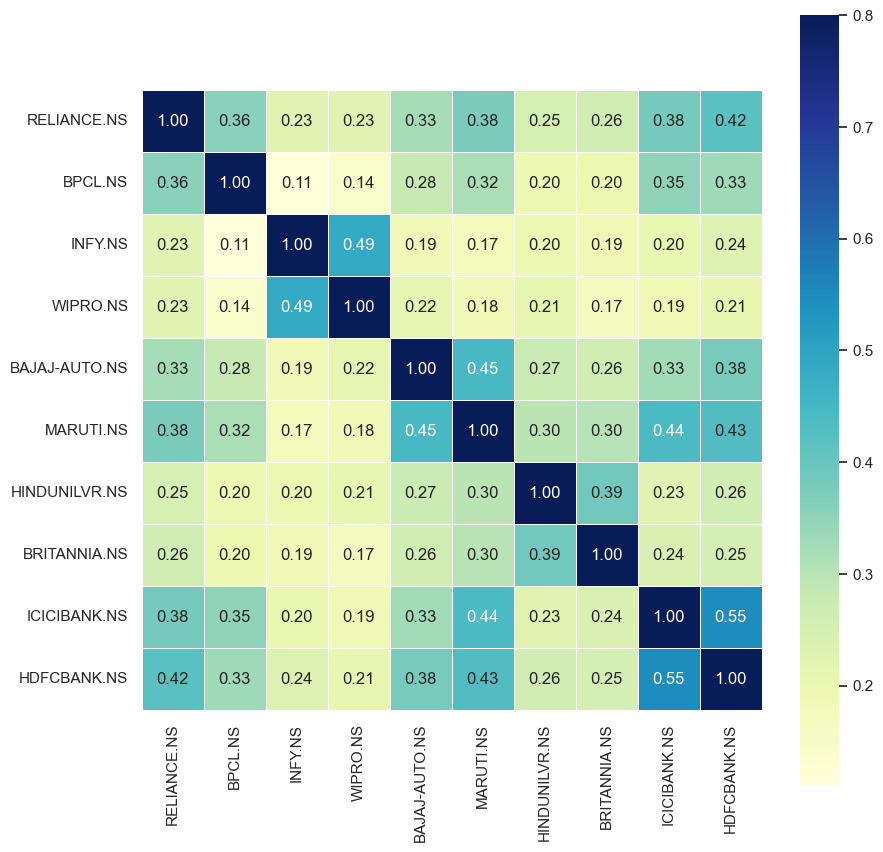

In [109]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between 
'TECHM.NS', 'INFY.NS', 'WIPRO.NS'(IT Corporates)
'BAJAJ-AUTO.NS', 'MARUTI.NS', 'EICHERMOT.NS'(Automobiles)
'HINDUNILVR.NS', 'BRITANNIA.NS', 'NESTLEIND.NS',(FMCG)
'AXISBANK.NS', 'ICICIBANK.NS', 'HDFCBANK.NS' (Private Banks stocks)

## 8. Nifty50 Index data

Finally, we will visualise data from the launch of the Nifty50 Index in Sep 2007 to the Mar 2023 as being representative of the NSE stock market.  


In [110]:
# Download Nifty50 historical stock data from Yahoo! Finance for 2007-2023

nifty50_2007_to_2023 = yf.download("^NSEI", start=datetime.datetime(2007, 9, 17), 
                                     end=datetime.datetime(2023, 3, 31))
nifty50_2007_to_2023

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2023-03-23  17097.400391  17205.400391  17045.300781  17076.900391   
2023-03-24  17076.199219  17109.449219  16917.349609  16945.050781   
2023-03-27  16984.300781  17091.000000  16918.550781  16985.699219   
2023-03-28  17031.750000  17061.750000  16913.750000  16951.699219   
2023-03-29  16977.300781  17126.150391  16940.599609  17080.699219   

               Adj Close  Volume  
Date                              
2007-09-17   4494.649902       0  
2007-09-18   4546.200195       0  
2007-09-19   4732.350098       0  
2007-09-20   4747.549805       0  
2007-09-21   4837.549805       0  
...                  ...     ...  
2023-03-23  17076.900391  219200  
2023-03-24  16945.050781  228000  
2023-03-27  16985.699219  218400  
2023-03-28  16951.699219  238800  
2023-03-29  17080.699219  345900  

[3808 rows x 6 columns]

In [111]:
nifty50_2007_to_2023.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902  4494.649902   
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195  4546.200195   
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098  4732.350098   
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805  4747.549805   
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805  4837.549805   

            Volume  
Date                
2007-09-17       0  
2007-09-18       0  
2007-09-19       0  
2007-09-20       0  
2007-09-21       0

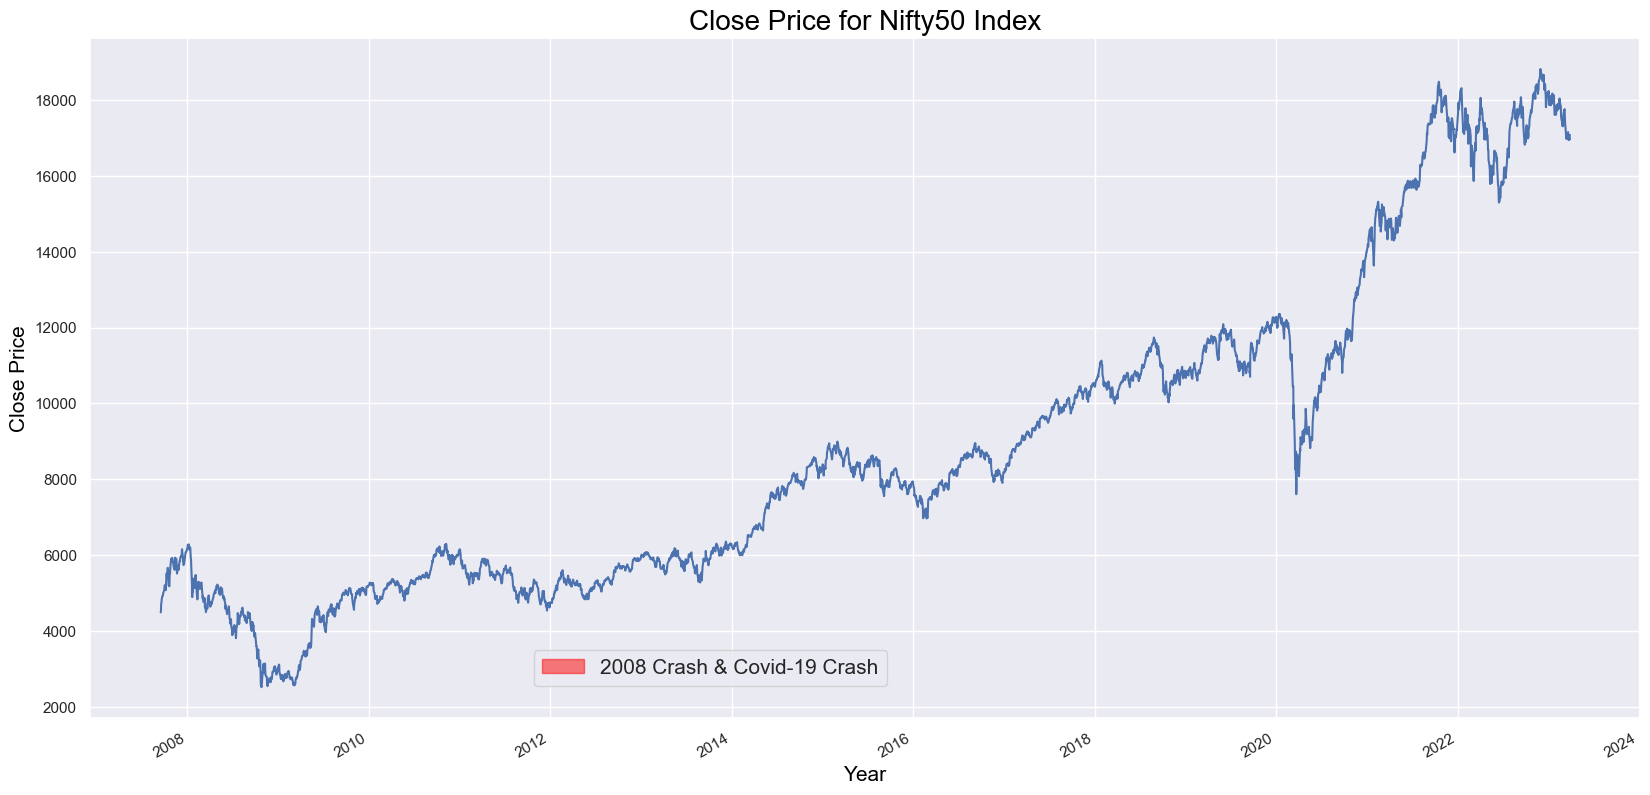

In [114]:
def nifty50_2007_to_2023_plot():
    nifty50_2007_to_2023['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    #plt.axvspan('2008','2010',color='r',alpha=.5)
    #plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for Nifty50 Index', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price', color = 'black', fontsize = 15)
    plt.show();

nifty50_2007_to_2023_plot()

The plot clearly shows the major market events of the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.